In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

Load data

In [8]:
## Load training && test data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train

,id,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,price
0,UVYA93,2/11/22,Indigo,6E,2106,3:00,Delhi,02h 10m,non-stop,5:10,Kolkata,economy,6270
1,1Y6UUB,2/11/22,AirAsia,I5,764,4:25,Delhi,10h 20m,1-stop,14:45,Bangalore,economy,7423
2,J62B2K,2/11/22,AirAsia,I5,764,4:25,Delhi,02h 10m,non-stop,6:35,Mumbai,economy,5956
3,HW31QF,2/11/22,AirAsia,I5,548,4:45,Delhi,02h 25m,non-stop,7:10,Kolkata,economy,6060
4,AI4BTM,2/11/22,AirAsia,I5,548,4:45,Delhi,14h 20m,1-stop,19:05,Bangalore,economy,21343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243533,VLDOSH,3/22/22,GO FIRST,G8,2508,23:45,Mumbai,14h 55m,1-stop,14:40,Hyderabad,economy,3916
243534,FOESQS,3/22/22,Indigo,6E,949,23:50,Hyderabad,01h 15m,non-stop,1:05,Bangalore,economy,1776
243535,SOD8M7,3/22/22,Indigo,6E,949,23:50,Hyderabad,06h 20m,1-stop,6:10,Kolkata,economy,2057
243536,BTYQT4,3/22/22,AirAsia,I5,557,23:50,Chennai,02h 25m,non-stop,2:15,Kolkata,economy,2359


In [12]:
data_train.loc[0, 'price']

100

Select Data && Preprocessing

In [3]:
## Date

date_train = data_train['date']
date_test = data_test['date']
date_x_train, date_x_test = [], []

for i in date_train:
    if i[0] == '2':
        tot = int(i[2:4]) - 11
        date_x_train.append(tot)
    else:
        if i[3] == '/':
            tot = 17 + int(i[2])
        else:
            tot = 17 + int(i[2:4])
        date_x_train.append(tot)

for i in date_test:
    if i[0] == '2':
        tot = int(i[2:4]) - 11
        date_x_test.append(tot)
    else:
        if i[3] == '/':
            tot = 17 + int(i[2])
        else:
            tot = 17 + int(i[2:4])
        date_x_test.append(tot)

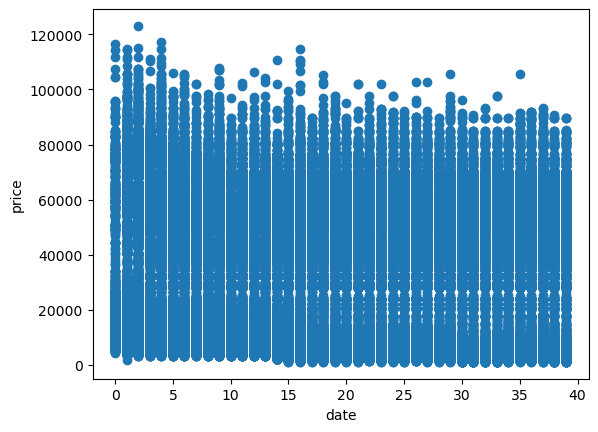

In [4]:
date_x = date_x_train
date_y = data_train['price']
plt.scatter(date_x, date_y)
plt.xlabel("date")
plt.ylabel("price")
plt.show()

In [6]:
## Stop

stop_train = data_train['stop']
stop_test = data_test['stop']
stop_x_train, stop_x_test = [], []
for i in stop_train:
    if i[0] == 'n':
        stop_x_train.append(0)
    elif i[0] == '1':
        stop_x_train.append(1)
    elif i[0] == '2':
        stop_x_train.append(2)

for i in stop_test:
    if i[0] == 'n':
        stop_x_test.append(0)
    elif i[0] == '1':
        stop_x_test.append(1)
    elif i[0] == '2':
        stop_x_test.append(2)

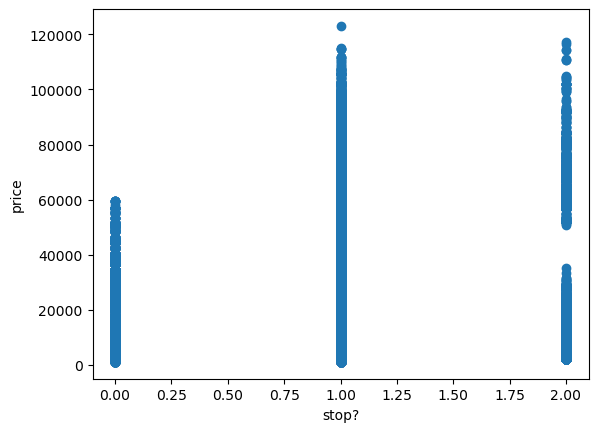

In [7]:
stop_x = stop_x_train
stop_y = data_train['price']
plt.scatter(stop_x, stop_y)
plt.xlabel("stop?")
plt.ylabel("price")
plt.show()

In [8]:
## Airline

airline_train = data_train['airline']
airline_test = data_test['airline']
category = []
for i in airline_train:
    if i not in category:
        category.append(i)

airline_x_train, airline_x_test = [], []
for i in airline_train:
    airline_x_train.append(category.index(i))
for i in airline_test:
    airline_x_test.append(category.index(i))
    

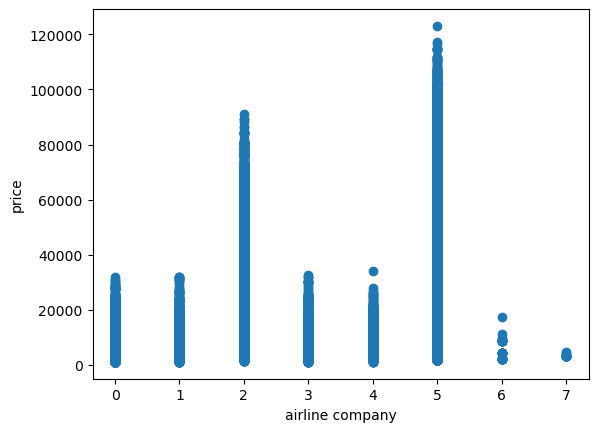

In [9]:
air_x = airline_x_train
air_y = data_train['price']
plt.scatter(air_x, air_y)
plt.xlabel("airline company")
plt.ylabel("price")
plt.show()

In [10]:
# Class

class_ = data_train['class']
class_x_train, class_x_test = [], []
for i in class_:
    if i == 'economy' or i == 0:
        class_x_train.append(0)
    elif i == 'business' or i == 1:
        class_x_train.append(1)

class_ = data_test['class']
for i in class_:
    if i == 'economy' or i == 0:
        class_x_test.append(0)
    elif i == 'business' or i == 1:
        class_x_test.append(1)


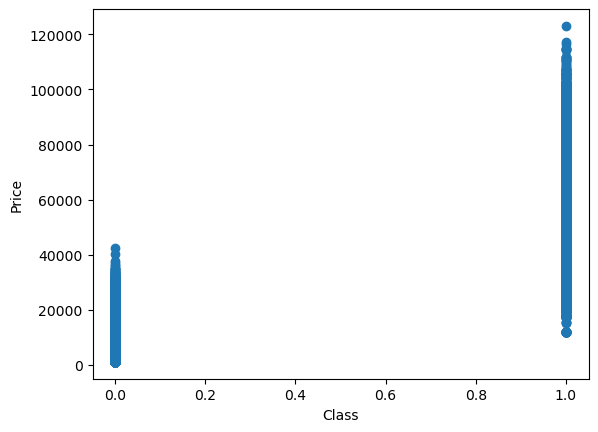

In [11]:
# Is business ticket expensive?
bus_x = class_x_train
bus_y = data_train['price']
plt.scatter(bus_x, bus_y)
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

In [12]:
# Time data: string to minutes
du_x = data_train['time_taken']
new_du_train, new_du_test = [], []
for i in du_x:
    if i[2] == 'h' and i[6] == 'm':
        hour = int(i[0:2])
        minute = int(i[4:6])
        total = hour * 60 + minute
        new_du_train.append(total)
    elif i[1] == 'h' and i[5] == 'm':
        hour = int(i[0:1])
        minute = int(i[3:5])
        total = hour * 60 + minute
        new_du_train.append(total)
    else:
        hour = float(i[0:4])
        total = hour * 60
        new_du_train.append(total)

du_x = data_test['time_taken']

for i in du_x:
    if i[2] == 'h' and i[6] == 'm':
        hour = int(i[0:2])
        minute = int(i[4:6])
        total = hour * 60 + minute
        new_du_test.append(total)
    elif i[1] == 'h' and i[5] == 'm':
        hour = int(i[0:1])
        minute = int(i[3:5])
        total = hour * 60 + minute
        new_du_test.append(total)
    else:
        hour = float(i[0:4])
        total = hour * 60
        new_du_test.append(total)


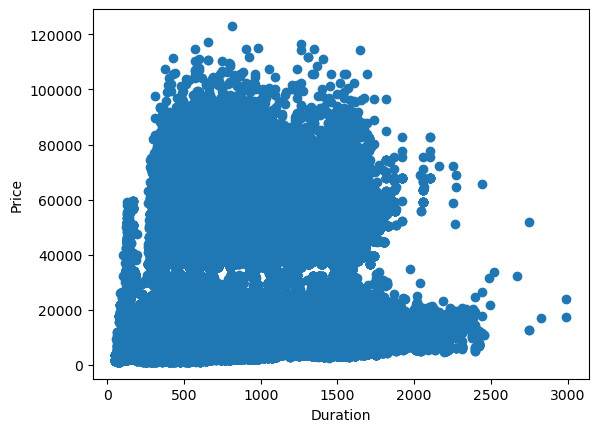

In [13]:
# duration effect to price
du_x = new_du_train
du_y = data_train['price']
plt.scatter(du_x, du_y)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

In [14]:
## Data processing
list_to_pandas = [bus_x, du_x, stop_x]
df = pd.DataFrame(list_to_pandas).transpose()
df.columns = ['class', 'time_taken', 'stop']
X_train = df
y_train = data_train['price']

Fit the model

In [15]:
## Choose a machine learning model (Random Forest)
model = RF(max_features=X_train.shape[1], n_estimators=100, random_state=42)

## Train the model on the training data
model = model.fit(X_train, y_train)

model

RandomForestRegressor(max_features=3, random_state=42)

Prediction

In [15]:
list_to_pandas = [class_x_test, new_du_test, stop_x_test]
df = pd.DataFrame(list_to_pandas).transpose()
df.columns = ['class', 'time_taken', 'stop']
X_test = df

In [29]:
y_pred = model.predict(X_test)
idx = data_test['id']
type(y_pred)

numpy.ndarray

In [17]:
## making csv file
list_to_pandas = [idx, y_pred]
df = pd.DataFrame(list_to_pandas).transpose()
df.columns = ['id', 'price']
df.to_csv('submission.csv', mode='w')